In [1]:
import pandas as pd

import numpy as np

import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
#import matplotlib_venn as venn

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.model_selection import train_test_split

!pip install textblob

import  textblob
import xgboost

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression

from textblob import TextBlob

from textblob import Word

import nltk
nltk.download('wordnet')

from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
lemmatizer = WordNetLemmatizer() 

In [3]:
a="application"

In [4]:
str(TextBlob(a).correct())

'application'

In [5]:
df1=pd.read_excel("..//input_data/Womens Clothing Reviews Data.xlsx")

In [6]:
list1=[]

for i in df1.columns:
    i=i.replace(" ","_")
    list1.append(i)
    

list1

df1.columns=list1

In [7]:
df1.Review_Text

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review_Text, Length: 23486, dtype: object

In [8]:
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    text = re.sub(r'[0-9]+', '', text)
    return(text)

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:

stop = set(nltk.corpus.stopwords.words('english'))

In [11]:
df1.Review_Text=df1.Review_Text.astype("str")

In [12]:
df1.Review_Text= df1.Review_Text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [13]:
df1.Review_Text = df1.Review_Text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [14]:
df1.Review_Text=df1.Review_Text.apply(clean_text)

In [15]:
#Performing exploratory analysis on the data to understand the patterns

In [16]:
#counting disctint lines in review comments- all the comments has only one line

In [17]:
df1['count_sent']=df1["Review_Text"].apply(lambda x: len(re.findall("\n",str(x)))+1)

In [18]:
df1.count_sent[df1.count_sent>1]

Series([], Name: count_sent, dtype: int64)

In [19]:
#Word count in each comment:
df1['count_word']=df1["Review_Text"].apply(lambda x: len(str(x).split()))

In [20]:
df1.count_word

0         5
1        31
2        52
3        16
4        17
         ..
23481    12
23482    25
23483    21
23484    39
23485    13
Name: count_word, Length: 23486, dtype: int64

In [21]:
# let's try to find the words which are used maximum in our review_text
# we will do a count_vectorizer



In [22]:

t1= CountVectorizer(analyzer='word', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             max_features=800)
t2 = t1.fit_transform(df1.Review_Text)

In [23]:
t2.toarray()

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
dtm1=t2.toarray()

In [25]:
t1.get_feature_names_out()

array(['_xd_', 'able', 'absolutely', 'across', 'actually', 'add', 'added',
       'addition', 'adorable', 'adore', 'again', 'ago', 'agree', 'airy',
       'aline', 'all', 'almost', 'along', 'already', 'also', 'although',
       'always', 'amazing', 'amount', 'and', 'ankle', 'another', 'anyone',
       'anything', 'anyway', 'appears', 'appropriate', 'area', 'arm',
       'armhole', 'arms', 'around', 'arrived', 'as', 'athletic',
       'available', 'away', 'awesome', 'awkward', 'baby', 'back', 'bad',
       'bag', 'baggy', 'band', 'barely', 'based', 'basic', 'bc', 'be',
       'beach', 'beautiful', 'beautifully', 'believe', 'belly', 'belt',
       'best', 'better', 'big', 'bigger', 'bit', 'black', 'blazer',
       'blouse', 'blue', 'bodice', 'body', 'boot', 'boots', 'booty',
       'bottom', 'bought', 'boxy', 'bra', 'brand', 'bright', 'broad',
       'brown', 'build', 'bulky', 'bust', 'busty', 'but', 'butt',
       'button', 'buy', 'buying', 'came', 'cami', 'camisole', 'cannot',
       '

In [26]:
dtm_df=pd.DataFrame(dtm1,columns = t1.get_feature_names_out())

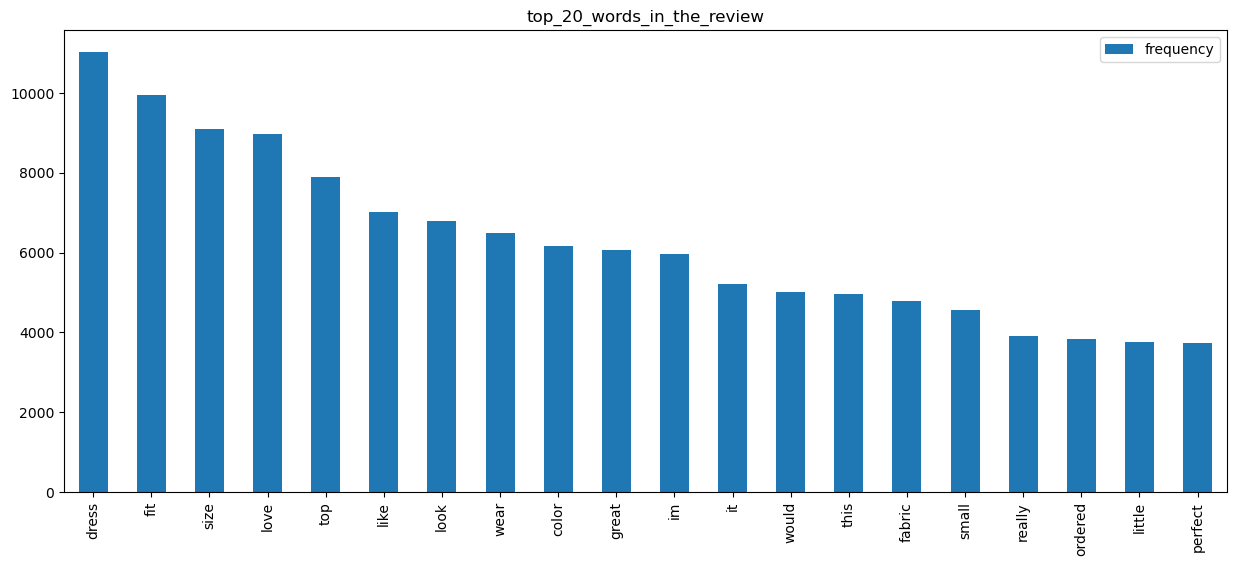

In [27]:
pd.DataFrame(dtm_df.sum(),columns=["frequency"]).sort_values(by=["frequency"],ascending=False).iloc[:20,:].plot(kind="bar",figsize=(15,6))
plt.title("top_20_words_in_the_review")
plt.show()

In [28]:
#df['sentiment'] = df["text"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [29]:
req=pd.DataFrame(dtm_df.sum(),columns=["frequency"]).sort_values(by=["frequency"],ascending=False)

In [30]:
TextBlob(list(req.index)[0]).sentiment.polarity

0.0

In [31]:
z=None

In [32]:
l1=[]
for i in list(req.index):
    
    z=TextBlob(i).sentiment.polarity
    l1.append(z)

In [33]:
s1=pd.Series(l1)

In [34]:
d1=pd.DataFrame(s1)

In [35]:
req=req.reset_index()

In [36]:
req.rename(columns={"index":"word"},inplace=True)

In [37]:
req1=pd.concat([req,d1],axis=1)

In [38]:
req1.columns=["word","frequency","sentiment_score"]

In [39]:
positive_words=req1[req1.sentiment_score>0]

In [40]:
negative_words=req1[req1.sentiment_score<0]

In [41]:
dict1={}

In [42]:
for i in range(len(negative_words)):
    dict1[negative_words.word.iloc[i]]=negative_words.frequency.iloc[i]


In [43]:
dict2={}

In [44]:
for i in range(len(positive_words)):
    dict2[positive_words.word.iloc[i]]=positive_words.frequency.iloc[i]

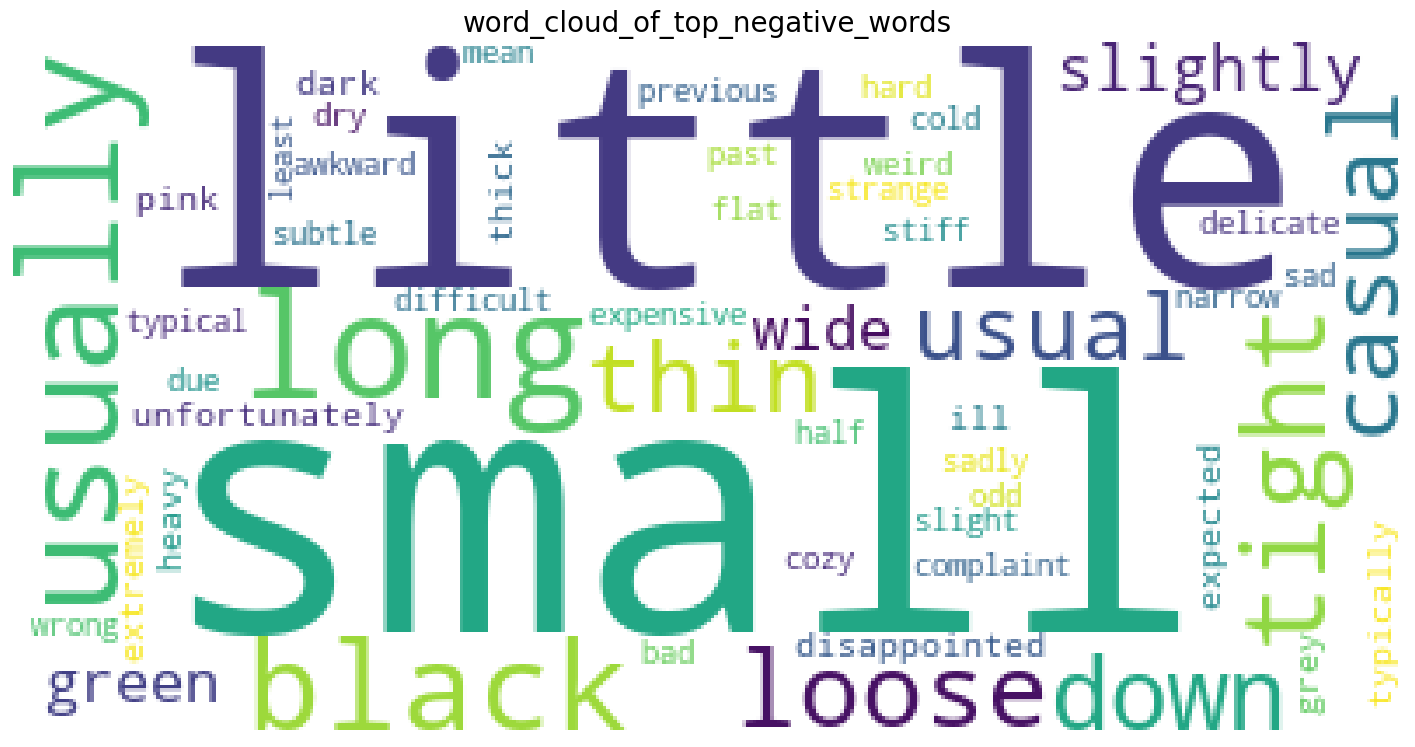

In [45]:

from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(background_color='white', stopwords=stop)

wordcloud = wordcloud.generate_from_frequencies(dict1)

fig = plt.figure(1, figsize=(18, 16))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("word_cloud_of_top_negative_words",fontsize=20)
plt.show()

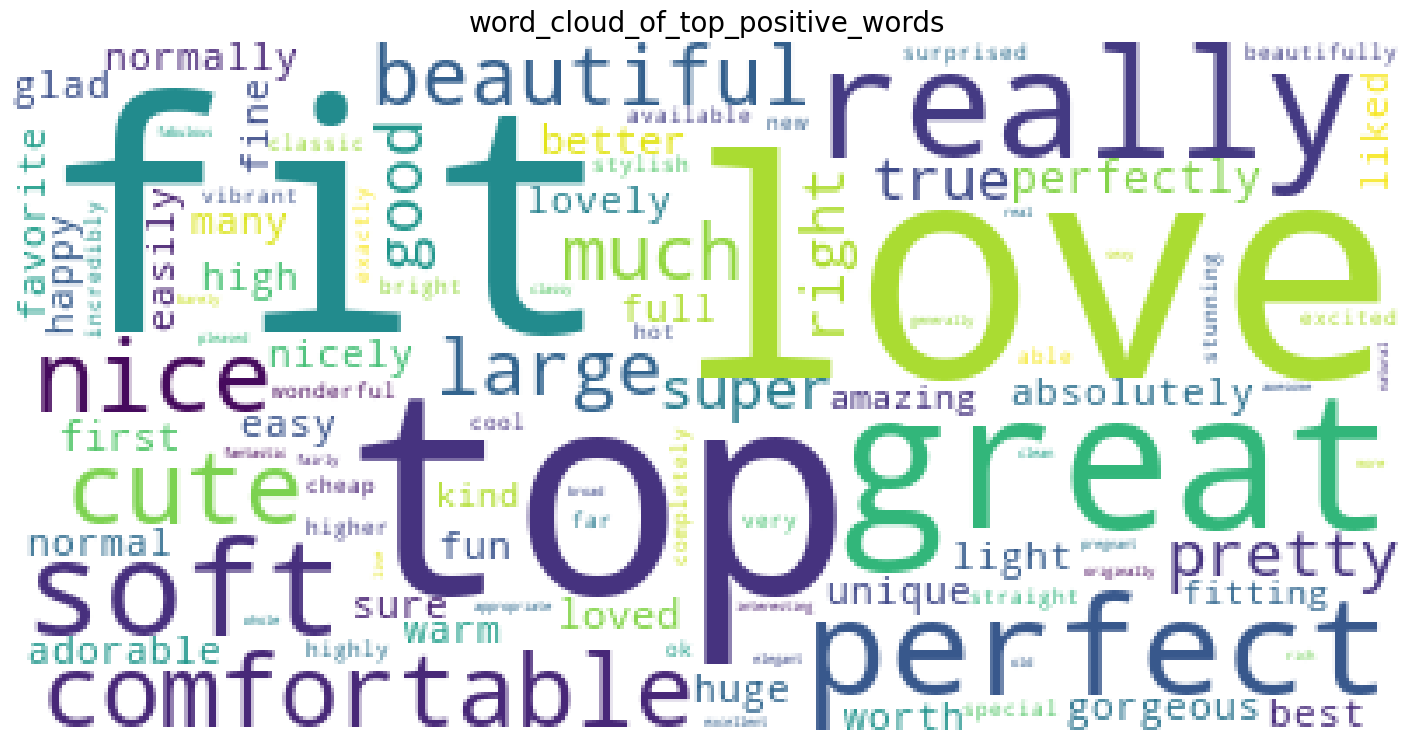

In [46]:
from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(background_color='white', stopwords=stop)

wordcloud = wordcloud.generate_from_frequencies(dict2)

fig = plt.figure(1, figsize=(18, 16))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("word_cloud_of_top_positive_words",fontsize=20)
plt.show()

In [47]:
# dividing the overall reviews into positive and negative review by doing sentiment analysis using text blob

In [48]:
df1["sentiment"]=df1["Review_Text"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [49]:
df1.columns

Index(['Product_ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Review_Title', 'Review_Text', 'Rating',
       'Recommend_Flag', 'count_sent', 'count_word', 'sentiment'],
      dtype='object')

In [50]:
from numpy import where as IF

In [51]:
df1["sentiment_analysis"]=IF(df1.sentiment>0.1,"positive",IF(df1.sentiment<-0.1,"negative","neutral"))

In [52]:
#81 perencent of the rveiews are positive , 18 perecent are negative and around 2 percent are neutral

In [53]:
(df1.sentiment_analysis.value_counts()/len(df1.sentiment_analysis))*100

sentiment_analysis
positive    79.851827
neutral     18.364132
negative     1.784042
Name: count, dtype: float64

sentimental analysis by channel,age group, category,sub-category, location-

1. we need to group the customer age into categorical variabe

2.We will do a chi-square to find if there is a relation between positive,negative and neutral sentiments and variables like channel,age group,category,subcategory,location 

3.We will create bar plots for the above variables also

In [54]:
df1["age_group"]=IF(df1.Customer_Age<21,"teenage",IF(df1.Customer_Age<40,"young_adult",IF(df1.Customer_Age<55,"adults","old_age")))

In [55]:
df1.Customer_Age.describe()

count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Customer_Age, dtype: float64

In [56]:
import scipy.stats as stats
import math

In [57]:
df1.Category.value_counts()

Category
General           13850
General Petite     8120
Initmates          1502
Name: count, dtype: int64

In [58]:
# chi sqaure test to understand relation between sentiment and category

In [59]:
observed_table = pd.crosstab(df1.sentiment_analysis, df1.Category, margins = True)

stats.chi2_contingency(observed = observed_table)

Chi2ContingencyResult(statistic=5.2374752665092625, pvalue=0.8131350066920686, dof=9, expected_freq=array([[  247.23713361,   144.95057941,    26.81228698,   419.        ],
       [ 2543.17910702,  1491.01908657,   275.80180641,  4310.        ],
       [11059.58375937,  6484.03033401,  1199.38590661, 18743.        ],
       [13850.        ,  8120.        ,  1502.        , 23472.        ]]))

In [60]:
# chi sqaure test to understand relation between sentiment and channeL

In [61]:
observed_table1 = pd.crosstab(df1.sentiment_analysis, df1.Channel, margins = True)

stats.chi2_contingency(observed = observed_table1)

Chi2ContingencyResult(statistic=1.6239834755614106, pvalue=0.9508376977714864, dof=6, expected_freq=array([[  176.67363536,   242.32636464,   419.        ],
       [ 1818.59997445,  2494.40002555,  4313.        ],
       [ 7907.72639019, 10846.27360981, 18754.        ],
       [ 9903.        , 13583.        , 23486.        ]]))

In [62]:
# chi sqaure test to understand relation between sentiment and sub-category

In [63]:
observed_table2 = pd.crosstab(df1.sentiment_analysis, df1.Subcategory1, margins = True)

stats.chi2_contingency(observed = observed_table2)

Chi2ContingencyResult(statistic=22.351697260700075, pvalue=0.2167444959604311, dof=18, expected_freq=array([[6.78161639e+01, 1.12800827e+02, 3.09715832e+01, 1.84222904e+01,
        1.86864860e+02, 2.12427573e+00, 4.19000000e+02],
       [6.97583930e+02, 1.16031399e+03, 3.18585975e+02, 1.89498978e+02,
        1.92216599e+03, 2.18511418e+01, 4.31000000e+03],
       [3.03359991e+03, 5.04588518e+03, 1.38544244e+03, 8.24078732e+02,
        8.35896915e+03, 9.50245825e+01, 1.87430000e+04],
       [3.79900000e+03, 6.31900000e+03, 1.73500000e+03, 1.03200000e+03,
        1.04680000e+04, 1.19000000e+02, 2.34720000e+04]]))

In [64]:
# chi sqaure test to understand relation between sentiment and location

In [65]:
observed_table3 = pd.crosstab(df1.sentiment_analysis, df1.Location, margins = True)

stats.chi2_contingency(observed = observed_table3)

Chi2ContingencyResult(statistic=10.011696014878394, pvalue=0.6149345215184052, dof=12, expected_freq=array([[   93.19833092,    41.55032785,   157.37030571,   126.88103551,
          419.        ],
       [  959.34224644,   427.70063016,  1619.90006813,  1306.05705527,
         4313.        ],
       [ 4171.45942263,  1859.74904198,  7043.72962616,  5679.06190922,
        18754.        ],
       [ 5224.        ,  2329.        ,  8821.        ,  7112.        ,
        23486.        ]]))

In [66]:
# chi sqaure test to understand relation between sentiment and age_group

In [67]:

observed_table4 = pd.crosstab(df1.sentiment_analysis, df1.age_group, margins = True)

stats.chi2_contingency(observed = observed_table4)


Chi2ContingencyResult(statistic=15.594057605522309, pvalue=0.21054416643935847, dof=12, expected_freq=array([[1.48343055e+02, 8.09598058e+01, 2.71174317e+00, 1.86985396e+02,
        4.19000000e+02],
       [1.52697756e+03, 8.33364302e+02, 2.79134804e+01, 1.92474466e+03,
        4.31300000e+03],
       [6.63967938e+03, 3.62367589e+03, 1.21374776e+02, 8.36926995e+03,
        1.87540000e+04],
       [8.31500000e+03, 4.53800000e+03, 1.52000000e+02, 1.04810000e+04,
        2.34860000e+04]]))

In [68]:
req2=df1[['age_group','Category', 'Subcategory1','Location','Channel','sentiment_analysis']]

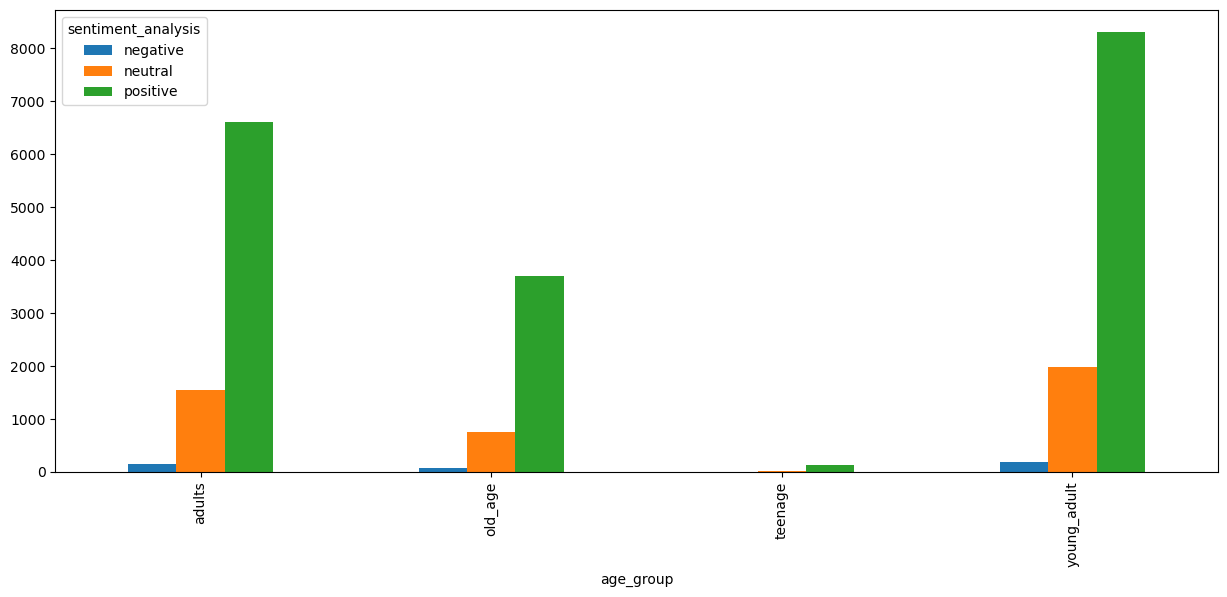

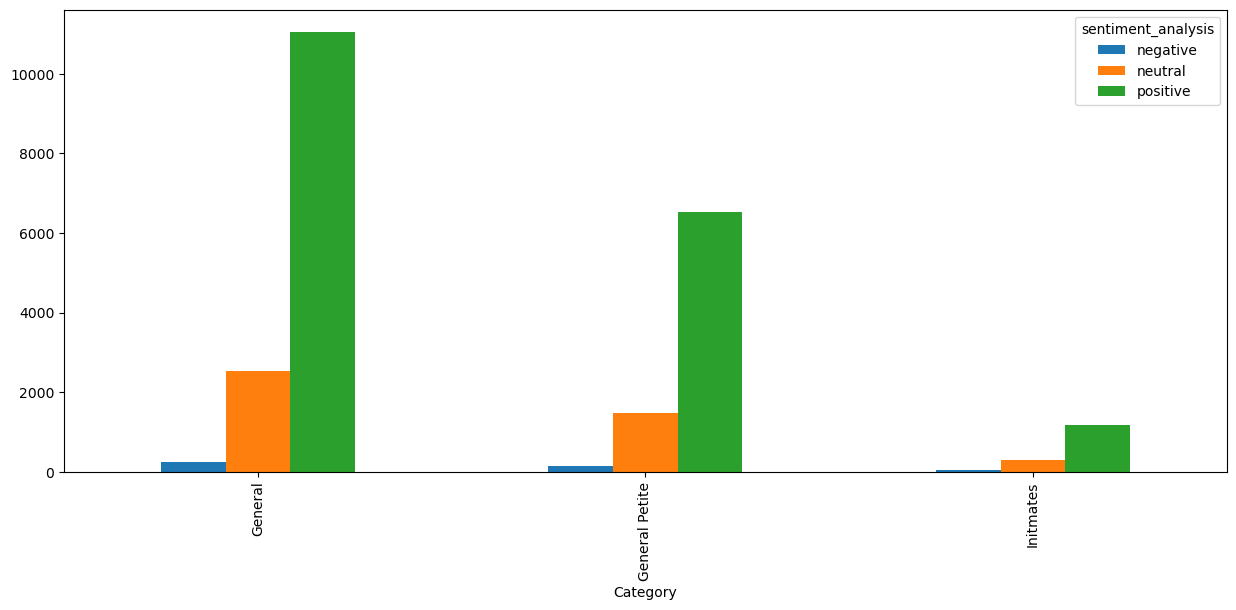

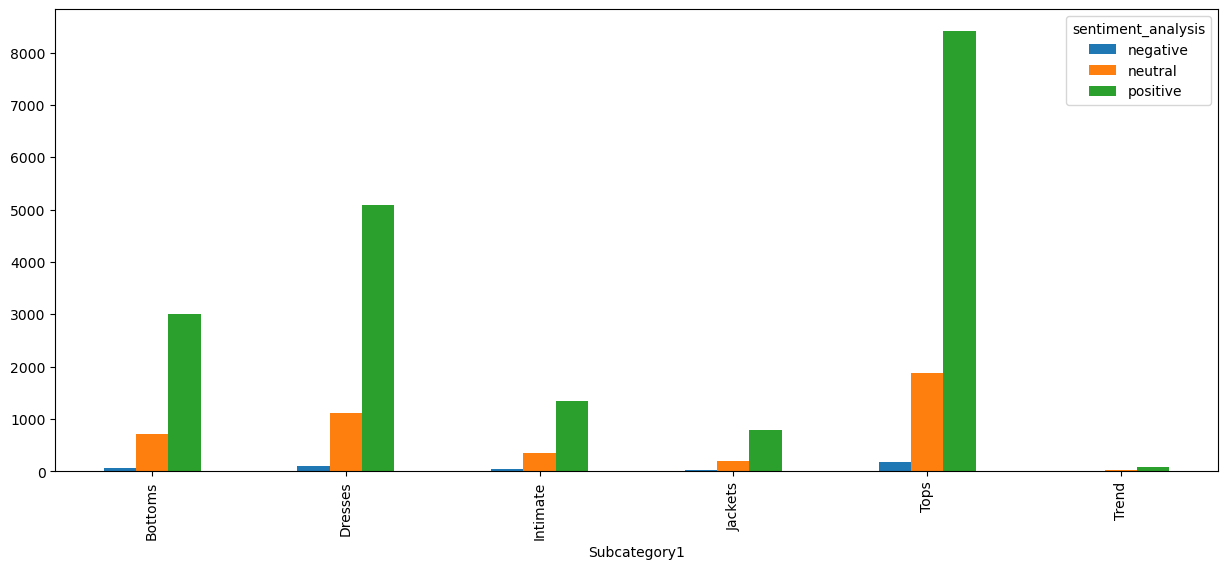

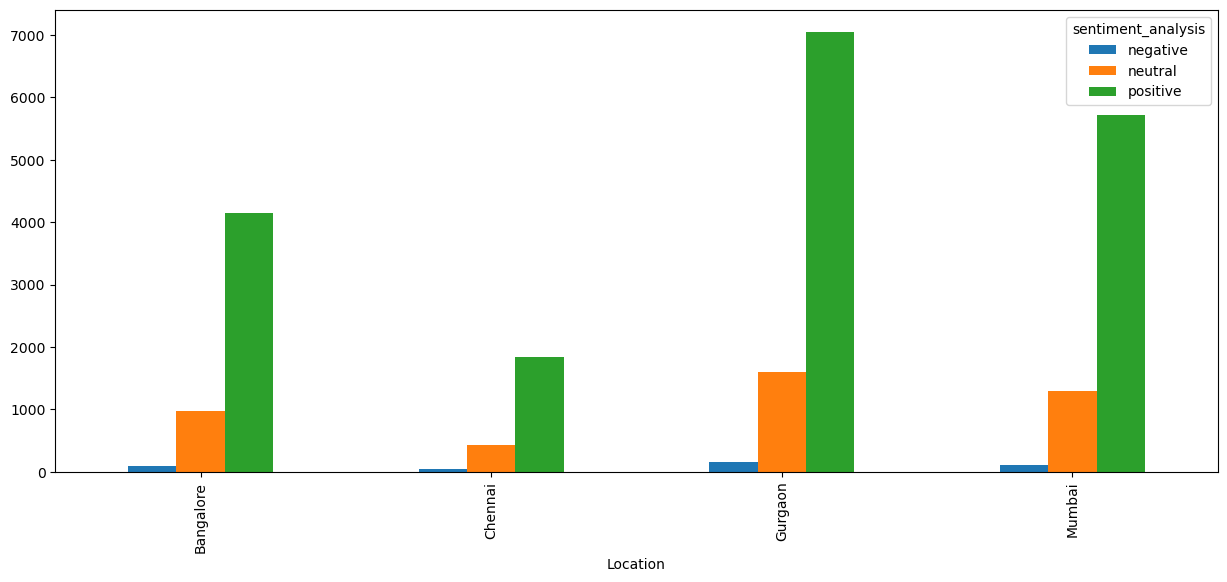

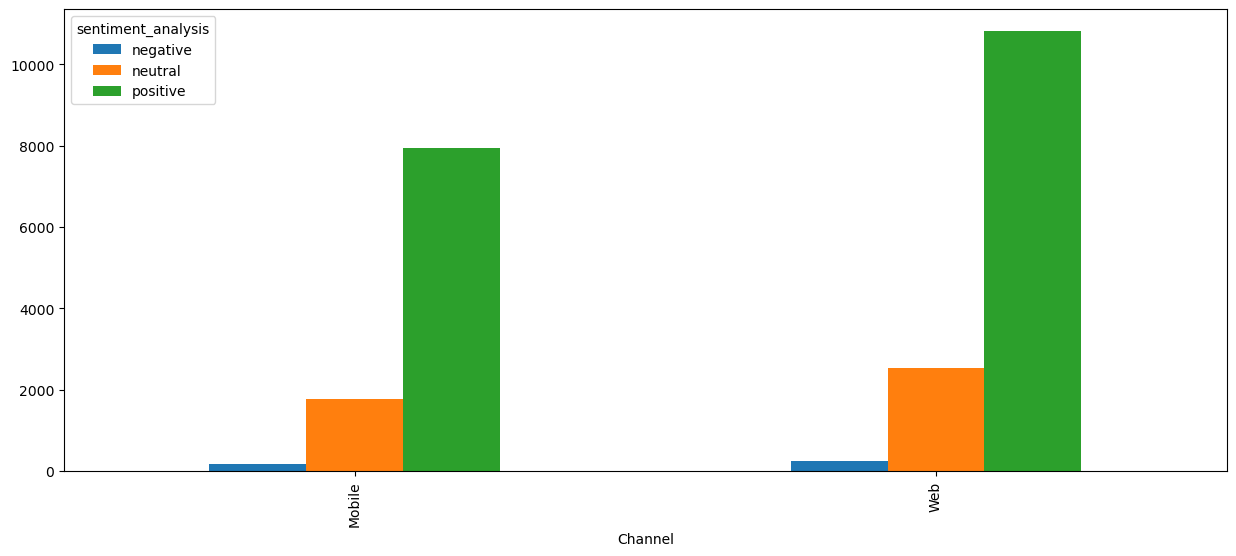

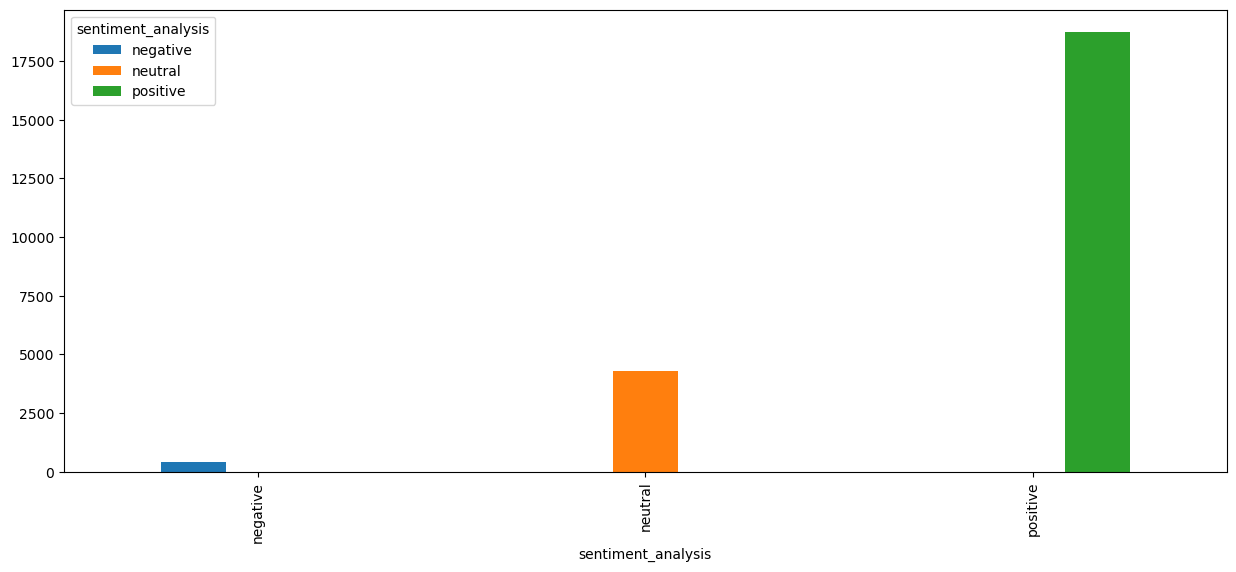

In [69]:
for i in list(req2.columns):
    (req2.groupby([i,"sentiment_analysis"]).agg({"sentiment_analysis":"count"}).add_prefix("count_of")).pivot_table(index=i,columns="sentiment_analysis",values="count_ofsentiment_analysis").plot(kind="bar",figsize=(15,6))

In [70]:
#Perform predictive analytics to understand the drivers of customers who are recommending the products.
# perform predictive analytics to predict ratings based on reviews

In [71]:
df1.Rating.value_counts()

Rating
5    13131
4     5077
3     2871
2     1565
1      842
Name: count, dtype: int64

In [72]:
df1.Review_Text

0             absolutely wonderful  silky sexy comfortable
1        love dress sooo pretty happened find store im ...
2        i high hope dress really wanted work me initia...
3        i love love love jumpsuit fun flirty fabulous ...
4        this shirt flattering due adjustable front tie...
                               ...                        
23481    i happy snag dress great price easy slip flatt...
23482    it reminds maternity clothes soft stretchy shi...
23483    this fit well top see through never would work...
23484    i bought dress wedding summer cute unfortunate...
23485    this dress lovely platinum feminine fit perfec...
Name: Review_Text, Length: 23486, dtype: object

In [73]:

count_vect = CountVectorizer(analyzer='word', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             lowercase = True,
                             max_features=500)

In [74]:
df1["ratings_dummy"]=IF(df1.Rating>3,"1",0)

In [75]:
df1.columns

Index(['Product_ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Review_Title', 'Review_Text', 'Rating',
       'Recommend_Flag', 'count_sent', 'count_word', 'sentiment',
       'sentiment_analysis', 'age_group', 'ratings_dummy'],
      dtype='object')

In [76]:
req3=df1[["Review_Text","ratings_dummy"]]

In [77]:
req3.ratings_dummy.value_counts()

ratings_dummy
1    18208
0     5278
Name: count, dtype: int64

In [78]:
y=req3.ratings_dummy

In [79]:
X=req3.Review_Text

In [80]:
count_vect_array = count_vect.fit_transform(X)

In [81]:
count_vect_array.toarray()

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [82]:
dtm_count=pd.DataFrame(count_vect_array.toarray(),columns=count_vect.get_feature_names_out())

In [83]:
dtm_count

_xd_  able  absolutely  across  actually  add  adorable  agree  all  \
0         0     0           1       0         0    0         0      0    0   
1         0     0           0       0         0    0         0      0    0   
2         0     0           0       0         0    0         0      0    0   
3         0     0           0       0         0    0         0      0    0   
4         0     0           0       0         0    0         0      0    0   
...     ...   ...         ...     ...       ...  ...       ...    ...  ...   
23481     0     0           0       0         0    0         0      0    0   
23482     0     0           0       0         0    0         0      0    0   
23483     0     1           0       0         0    0         0      0    0   
23484     0     0           0       0         0    0         0      0    0   
23485     0     0           0       0         0    0         0      0    0   

       almost  ...  worth  would  xl  xs  xx  year  yellow  yet  you  zipper  
0           0  ...      0      0   0   0   0     0       0    0    0       0  
1           0  ...      0      2   0   0   0     0       0    0    0       0  
2           0  ...      0      0   0   0   0     0       0    0    0       1  
3           0  ...      0      0   0   0   0     0       0    0    0       0  
4           0  ...      0      0   0   0   0     0       0    0    0       0  
...       ...  ...    ...    ...  ..  ..  ..   ...     ...  ...  ...     ...  
23481       0  ...      0      0   0   0   0     0       0    0    0       0  
23482       0  ...      0      0   0   0   0     0       0    0    0       0  
23483       0  ...      0      2   0   0   0     0       0    0    0       0  
23484       0  ...      1      0   0   0   0     0       0    0    0       0  
23485       0  ...      0      0   0   0   0     0       0    0    0       0  

[23486 rows x 500 columns]

In [84]:
#splitting to train and test dataset
X_train, X_test, y_train, y_test = train_test_split(dtm_count,y,test_size = 0.3,random_state=123)

In [85]:
X_train

_xd_  able  absolutely  across  actually  add  adorable  agree  all  \
2060      0     0           0       0         0    0         0      0    0   
15432     0     1           0       0         0    0         0      0    0   
20377     0     0           0       0         0    0         0      0    0   
22863     0     0           2       0         0    0         0      0    0   
19939     0     0           0       0         0    0         0      0    0   
...     ...   ...         ...     ...       ...  ...       ...    ...  ...   
15377     0     0           1       0         0    0         0      0    0   
21602     0     0           0       0         0    0         0      0    0   
17730     0     0           0       0         0    0         0      0    0   
15725     0     0           0       0         0    0         0      0    0   
19966     0     0           0       0         0    0         0      0    0   

       almost  ...  worth  would  xl  xs  xx  year  yellow  yet  you  zipper  
2060        0  ...      0      0   0   0   0     0       0    0    0       0  
15432       0  ...      0      0   0   0   0     0       0    0    0       0  
20377       0  ...      0      0   0   0   0     0       0    0    0       0  
22863       0  ...      0      0   0   0   0     0       0    0    0       0  
19939       0  ...      0      0   2   0   0     0       0    0    0       0  
...       ...  ...    ...    ...  ..  ..  ..   ...     ...  ...  ...     ...  
15377       0  ...      0      0   0   0   0     0       0    0    0       0  
21602       0  ...      0      0   0   0   0     0       0    0    0       0  
17730       0  ...      0      0   0   0   0     0       0    0    0       0  
15725       0  ...      0      0   0   0   0     0       0    0    0       0  
19966       0  ...      0      0   0   0   0     0       0    0    0       0  

[16440 rows x 500 columns]

In [86]:
#Bulidng models using SVC(support vector classifier)

In [87]:
#sklern.svm
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR

In [88]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1]}

In [89]:
model = SVC()
grid = GridSearchCV(model, param_grid)

In [90]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [1]})

In [91]:
print(grid.best_params_)

{'C': 1}


In [92]:
model = grid.best_estimator_

In [93]:
y_pred_test = model.predict(X_test)

In [94]:
y_pred_train = model.predict(X_train)

In [95]:
y_train.value_counts()

ratings_dummy
1    12662
0     3778
Name: count, dtype: int64

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.55      0.64      1500
           1       0.89      0.95      0.92      5546

    accuracy                           0.87      7046
   macro avg       0.82      0.75      0.78      7046
weighted avg       0.86      0.87      0.86      7046



In [97]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      3778
           1       0.95      0.99      0.97     12662

    accuracy                           0.95     16440
   macro avg       0.95      0.90      0.92     16440
weighted avg       0.95      0.95      0.95     16440



In [98]:
#We are getting 95 % accuracy in train data and 87% accuracy in test data

In [99]:
# building models using KNN

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
std_data = StandardScaler()
std_data = std_data.fit(X_train)

In [102]:
train_X_std = std_data.transform(X_train)

In [103]:
test_X_std=std_data.transform(X_test)

In [104]:
#Tuning the parameterers

In [105]:
#if we don't tuning parameters
param_grid = {'n_neighbors':[10,20,30,50,50], 
              'weights':['uniform', 'distance']    
}

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn_model_gcv = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='accuracy', cv=5, verbose=True)
knn_model_gcv.fit(train_X_std, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 20, 30, 50, 50],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=True)

In [108]:
#building the model with best parameters

In [109]:
knn_model_gcv.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [110]:
knn_model = KNeighborsClassifier(n_neighbors=10, weights='uniform', n_jobs=-1)

knn_model.fit(train_X_std,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [111]:
y_pred_train_knn=knn_model.predict(train_X_std)

In [112]:
y_pred_test_knn=knn_model.predict(test_X_std)

In [113]:
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.66      0.23      0.34      1500
           1       0.82      0.97      0.89      5546

    accuracy                           0.81      7046
   macro avg       0.74      0.60      0.62      7046
weighted avg       0.79      0.81      0.77      7046



In [114]:
print(classification_report(y_train, y_pred_train_knn))

              precision    recall  f1-score   support

           0       0.80      0.32      0.45      3778
           1       0.83      0.98      0.90     12662

    accuracy                           0.82     16440
   macro avg       0.81      0.65      0.67     16440
weighted avg       0.82      0.82      0.79     16440



In [115]:
#82% accuracy in train and 81% accuracy in test using KNN 

In [116]:
# XG BOOST
from xgboost import XGBClassifier, XGBRegressor

In [117]:
param_grid = {'learning_rate' : [0.01, 0.05, 0.1],
                               'n_estimators' : [100,200,300]}

In [118]:
xgcv = GridSearchCV(XGBClassifier(), param_grid, scoring="accuracy",cv=5)



In [119]:
X_train.dtypes

_xd_          int64
able          int64
absolutely    int64
across        int64
actually      int64
              ...  
year          int64
yellow        int64
yet           int64
you           int64
zipper        int64
Length: 500, dtype: object

In [120]:
y_train.dtypes

dtype('O')

In [121]:
y_train = np.array(y_train, dtype=int)

In [122]:
y_train.dtype

dtype('int32')

In [123]:
X_train.dtypes

_xd_          int64
able          int64
absolutely    int64
across        int64
actually      int64
              ...  
year          int64
yellow        int64
yet           int64
you           int64
zipper        int64
Length: 500, dtype: object

In [124]:
xgcv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...one,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [125]:
print(xgcv.best_params_)

{'learning_rate': 0.1, 'n_estimators': 300}


In [126]:
from xgboost import XGBClassifier

In [127]:
model_Xg_boost = XGBClassifier()

In [128]:
model_Xg_boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [129]:
model_Xg_boost=XGBClassifier(learning_rate=0.01, n_estimators=300)

In [130]:
import xgboost
import sklearn
print(f"xgboost version: {xgboost.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")

xgboost version: 2.1.2
scikit-learn version: 1.5.2


In [131]:
!pip install --upgrade xgboost scikit-learn

In [132]:
model_Xg_boost.fit(X_train, y_train)
print("Training completed.")

Training completed.


In [133]:
y_pred_train_xg = model_Xg_boost.predict(X_train)

In [134]:
y_pred_test_xg=model_Xg_boost.predict(X_test)

In [135]:
y_test = y_test.astype(int)  # or .astype(str) for both
y_pred_test_xg = y_pred_test_xg.astype(int)  # or .astype(str)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_xg))

              precision    recall  f1-score   support

           0       0.77      0.28      0.41      1500
           1       0.83      0.98      0.90      5546

    accuracy                           0.83      7046
   macro avg       0.80      0.63      0.66      7046
weighted avg       0.82      0.83      0.80      7046



In [136]:
print(classification_report(y_train, y_pred_train_xg))

              precision    recall  f1-score   support

           0       0.90      0.34      0.49      3778
           1       0.83      0.99      0.90     12662

    accuracy                           0.84     16440
   macro avg       0.87      0.66      0.70     16440
weighted avg       0.85      0.84      0.81     16440



In [137]:
#84% accuracy in train and 83% accuracy in test data using XG BOOST

In [138]:
df1

Product_ID        Category Subcategory1 SubCategory2   Location  \
0             767       Initmates     Intimate    Intimates     Mumbai   
1            1080         General      Dresses      Dresses  Bangalore   
2            1077         General      Dresses      Dresses    Gurgaon   
3            1049  General Petite      Bottoms        Pants    Chennai   
4             847         General         Tops      Blouses  Bangalore   
...           ...             ...          ...          ...        ...   
23481        1104  General Petite      Dresses      Dresses    Gurgaon   
23482         862  General Petite         Tops        Knits    Gurgaon   
23483        1104  General Petite      Dresses      Dresses    Gurgaon   
23484        1084         General      Dresses      Dresses    Gurgaon   
23485        1104  General Petite      Dresses      Dresses    Chennai   

      Channel  Customer_Age  \
0      Mobile            33   
1      Mobile            34   
2      Mobile            60   
3         Web            50   
4         Web            47   
...       ...           ...   
23481  Mobile            34   
23482     Web            48   
23483     Web            31   
23484     Web            28   
23485  Mobile            52   

                                            Review_Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of cotton   
23483                              Cute, but see through   
23484  Very cute dress, perfect for summer parties an...   
23485                    Please make more like this one!   

                                             Review_Text  Rating  \
0           absolutely wonderful  silky sexy comfortable       4   
1      love dress sooo pretty happened find store im ...       5   
2      i high hope dress really wanted work me initia...       3   
3      i love love love jumpsuit fun flirty fabulous ...       5   
4      this shirt flattering due adjustable front tie...       5   
...                                                  ...     ...   
23481  i happy snag dress great price easy slip flatt...       5   
23482  it reminds maternity clothes soft stretchy shi...       3   
23483  this fit well top see through never would work...       3   
23484  i bought dress wedding summer cute unfortunate...       3   
23485  this dress lovely platinum feminine fit perfec...       5   

       Recommend_Flag  count_sent  count_word  sentiment sentiment_analysis  \
0                   1           1           5   0.633333           positive   
1                   1           1          31   0.318750           positive   
2                   0           1          52   0.082300            neutral   
3                   1           1          16   0.500000           positive   
4                   1           1          17   0.458333           positive   
...               ...         ...         ...        ...                ...   
23481               1           1          12   0.677778           positive   
23482               1           1          25   0.191667           positive   
23483               0           1          21   0.450000           positive   
23484               1           1          39   0.416667           positive   
23485               1           1          13   0.373333           positive   

         age_group ratings_dummy  
0      young_adult             1  
1      young_adult             1  
2          old_age             0  
3           adults             1  
4           adults             1  
...            ...           ...  
23481  young_

In [139]:
# predicting which customers recommended based on factorslike category,sub-category,location, channel,customer_age
# we will use Logistic_regression and Random Foriest which will help us to predict which variabes are more important in determinig if someone will recommmed the product or not

In [140]:
df1.columns

Index(['Product_ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Review_Title', 'Review_Text', 'Rating',
       'Recommend_Flag', 'count_sent', 'count_word', 'sentiment',
       'sentiment_analysis', 'age_group', 'ratings_dummy'],
      dtype='object')

In [141]:
req4=df1[['Category', 'Subcategory1','Customer_Age','Rating','sentiment','Channel','Location','Recommend_Flag']]

In [142]:
req4.isna().sum()

Category          14
Subcategory1      14
Customer_Age       0
Rating             0
sentiment          0
Channel            0
Location           0
Recommend_Flag     0
dtype: int64

In [143]:
# missing value treatment for category and subcategory1

In [144]:
req4.Category=req4.Category.fillna(req4.Category.mode().iloc[0])

C:\Users\DELL\AppData\Local\Temp\ipykernel_14456\1246112302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req4.Category=req4.Category.fillna(req4.Category.mode().iloc[0])


In [145]:
req4.Subcategory1=req4.Subcategory1.fillna(req4.Category.mode().iloc[0])

C:\Users\DELL\AppData\Local\Temp\ipykernel_14456\370317021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req4.Subcategory1=req4.Subcategory1.fillna(req4.Category.mode().iloc[0])


In [146]:
req4.isna().sum()

Category          0
Subcategory1      0
Customer_Age      0
Rating            0
sentiment         0
Channel           0
Location          0
Recommend_Flag    0
dtype: int64

In [147]:
req4.Recommend_Flag.value_counts() # imbalance data, we will fist find the cut off probaility and then determine the case for 0,1

Recommend_Flag
1    19314
0     4172
Name: count, dtype: int64

In [148]:
req4

Category Subcategory1  Customer_Age  Rating  sentiment Channel  \
0           Initmates     Intimate            33       4   0.633333  Mobile   
1             General      Dresses            34       5   0.318750  Mobile   
2             General      Dresses            60       3   0.082300  Mobile   
3      General Petite      Bottoms            50       5   0.500000     Web   
4             General         Tops            47       5   0.458333     Web   
...               ...          ...           ...     ...        ...     ...   
23481  General Petite      Dresses            34       5   0.677778  Mobile   
23482  General Petite         Tops            48       3   0.191667     Web   
23483  General Petite      Dresses            31       3   0.450000     Web   
23484         General      Dresses            28       3   0.416667     Web   
23485  General Petite      Dresses            52       5   0.373333  Mobile   

        Location  Recommend_Flag  
0         Mumbai               1  
1      Bangalore               1  
2        Gurgaon               0  
3        Chennai               1  
4      Bangalore               1  
...          ...             ...  
23481    Gurgaon               1  
23482    Gurgaon               1  
23483    Gurgaon               0  
23484    Gurgaon               1  
23485    Chennai               1  

[23486 rows x 8 columns]

In [149]:
req4.duplicated().sum() # checking dupliacte values in the data

181

In [150]:
#dropping the duplicate rows

In [151]:
req4=req4[-req4.duplicated()]

In [152]:
req4.columns

Index(['Category', 'Subcategory1', 'Customer_Age', 'Rating', 'sentiment',
       'Channel', 'Location', 'Recommend_Flag'],
      dtype='object')

In [153]:
categorical_col=req4[['Category', 'Subcategory1','Channel', 'Location']]

In [154]:
categorical_col=pd.get_dummies(categorical_col,drop_first=True)

In [155]:
def out_capping_flooring(x,a,b):
    x=x.clip(lower=x.quantile(a),upper=x.quantile(b))

In [156]:
continous_col=req4[['Customer_Age', 'Rating', 'sentiment']]

In [157]:
y=req4[["Recommend_Flag"]]

In [158]:
req5=pd.concat([continous_col,categorical_col,y],axis=1)

In [159]:
req5

Customer_Age  Rating  sentiment  Category_General Petite  \
0                33       4   0.633333                    False   
1                34       5   0.318750                    False   
2                60       3   0.082300                    False   
3                50       5   0.500000                     True   
4                47       5   0.458333                    False   
...             ...     ...        ...                      ...   
23481            34       5   0.677778                     True   
23482            48       3   0.191667                     True   
23483            31       3   0.450000                     True   
23484            28       3   0.416667                    False   
23485            52       5   0.373333                     True   

       Category_Initmates  Subcategory1_Dresses  Subcategory1_General  \
0                    True                 False                 False   
1                   False                  True                 False   
2                   False                  True                 False   
3                   False                 False                 False   
4                   False                 False                 False   
...                   ...                   ...                   ...   
23481               False                  True                 False   
23482               False                 False                 False   
23483               False                  True                 False   
23484               False                  True                 False   
23485               False                  True                 False   

       Subcategory1_Intimate  Subcategory1_Jackets  Subcategory1_Tops  \
0                       True                 False              False   
1                      False                 False              False   
2                      False                 False              False   
3                      False                 False              False   
4                      False                 False               True   
...                      ...                   ...                ...   
23481                  False                 False              False   
23482                  False                 False               True   
23483                  False                 False              False   
23484                  False                 False              False   
23485                  False                 False              False   

       Subcategory1_Trend  Channel_Web  Location_Chennai  Location_Gurgaon  \
0                   False        False             False             False   
1                   False        False             False             False   
2                   False        False             False              True   
3                   False         True              True             False   
4                   False         True             False             False   
...                   ...          ...               ...               ...   
23481               False        False             False              True   
23482               False         True             False              True   
23483               False         True             False              True   
23484               False         True             False              True   
23485               False        False              True             False   

       Location_Mumbai  Recommend_Flag  
0                 True               1  
1                False               1  
2                False               0  
3                False               1  
4                False               1  
...                ...             ...  
23481            False               1  
23482            False               1  
23483            False               0  
23484            False               1  
23485            False               1  

[23305 rows x 16 c

In [160]:
req5.rename(columns={'Category_General Petite':'Category_General_Petite'},inplace=True)

In [161]:
#we will not do any feature_reduction step as we have only 15 col

In [162]:
for i in list(req5.columns):
    print(i+"+",end="")

Customer_Age+Rating+sentiment+Category_General_Petite+Category_Initmates+Subcategory1_Dresses+Subcategory1_General+Subcategory1_Intimate+Subcategory1_Jackets+Subcategory1_Tops+Subcategory1_Trend+Channel_Web+Location_Chennai+Location_Gurgaon+Location_Mumbai+Recommend_Flag+

In [163]:
equation_logit="Recommend_Flag~Customer_Age+Rating+sentiment+Category_General_Petite+Category_Initmates+Subcategory1_Dresses+Subcategory1_General+Subcategory1_Intimate+Subcategory1_Jackets+Subcategory1_Tops+Subcategory1_Trend+Channel_Web+Location_Chennai+Location_Gurgaon+Location_Mumbai"


In [164]:
import statsmodels.formula.api as smf

In [165]:
train_logit,test_logit= train_test_split(req5,test_size = 0.3,random_state=123)

In [166]:
list(train_logit.dtypes.index)

['Customer_Age',
 'Rating',
 'sentiment',
 'Category_General_Petite',
 'Category_Initmates',
 'Subcategory1_Dresses',
 'Subcategory1_General',
 'Subcategory1_Intimate',
 'Subcategory1_Jackets',
 'Subcategory1_Tops',
 'Subcategory1_Trend',
 'Channel_Web',
 'Location_Chennai',
 'Location_Gurgaon',
 'Location_Mumbai',
 'Recommend_Flag']

In [167]:
import os

In [168]:
os.getcwd()

'C:\\Users\\DELL\\Documents\\ALABS\\Python_ML_Project\\CS5\\src'

In [169]:
for i in list(train_logit.columns):
    print(i+"+",end="")

Customer_Age+Rating+sentiment+Category_General_Petite+Category_Initmates+Subcategory1_Dresses+Subcategory1_General+Subcategory1_Intimate+Subcategory1_Jackets+Subcategory1_Tops+Subcategory1_Trend+Channel_Web+Location_Chennai+Location_Gurgaon+Location_Mumbai+Recommend_Flag+

In [170]:
model_logit=smf.logit(equation_logit,data=train_logit).fit()

Optimization terminated successfully.
         Current function value: 0.140584
         Iterations 17


In [171]:
print(model_logit.summary())

                           Logit Regression Results                           
Dep. Variable:         Recommend_Flag   No. Observations:                16313
Model:                          Logit   Df Residuals:                    16297
Method:                           MLE   Df Model:                           15
Date:                Tue, 05 Nov 2024   Pseudo R-squ.:                  0.7025
Time:                        12:26:33   Log-Likelihood:                -2293.4
converged:                       True   LL-Null:                       -7709.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         -10.2706      0.291    -35.272      0.000     -10.841      -9.700
Category_General_Petite[T.True]     0.0797      0.083      0.962    

In [172]:
# finding the roc_auc score for train and test data

In [173]:
model_logit.predict(train_logit)

12934    0.997996
6174     0.969008
19104    0.938925
8596     0.390824
6281     0.950863
           ...   
15466    0.997869
21763    0.282076
17835    0.522230
15818    0.968321
20100    0.998503
Length: 16313, dtype: float64

In [174]:
train_auc = metrics.roc_auc_score(train_logit.Recommend_Flag, model_logit.predict(train_logit))
train_auc

0.9758359562426562

In [175]:
test_auc = metrics.roc_auc_score(test_logit.Recommend_Flag, model_logit.predict(test_logit))

In [176]:
test_auc

0.9718329861567316

In [177]:
# finding the cut off for proability to convert probability into class

In [178]:
train_logit["prob"]=model_logit.predict(train_logit)

In [179]:
test_logit["prob"]=model_logit.predict(test_logit)

In [181]:
# temp

In [182]:
temp=train_logit

In [183]:
roc_df = pd.DataFrame()
for cut_off in np.linspace(0,1,50):
    temp['y_pred'] = np.where(temp.prob>cut_off, 1, 0)
    temp['TP'] = np.where(((temp.Recommend_Flag ==1) & (temp.y_pred==1)), 1,0)
    temp['TN'] = np.where(((temp.Recommend_Flag ==0) & (temp.y_pred==0)), 1,0)
    temp['FP'] = np.where(((temp.Recommend_Flag ==0) & (temp.y_pred==1)), 1,0)
    temp['FN'] = np.where(((temp.Recommend_Flag ==1) & (temp.y_pred==0)), 1,0)
    sensitivity = temp.TP.sum()/(temp.TP.sum()+temp.FN.sum())
    specificity = temp.TN.sum()/(temp.TN.sum()+temp.FP.sum())
    accuracy = (temp.TN.sum()+temp.TP.sum())/(temp.y_pred.count())
    temp_df = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    temp_df.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_df = pd.concat([roc_df, temp_df], axis=0)

In [184]:
roc_df["total"]=roc_df.sensitivity+roc_df.specificity

In [185]:
roc_df[roc_df.total==roc_df.total.max()]

cutoff  sensitivity  specificity  accuracy     total
0  0.693878     0.933328     0.956935  0.937596  1.890263
0  0.714286     0.933328     0.956935  0.937596  1.890263
0  0.734694     0.933328     0.956935  0.937596  1.890263
0  0.755102     0.933328     0.956935  0.937596  1.890263
0  0.775510     0.933328     0.956935  0.937596  1.890263
0  0.795918     0.933328     0.956935  0.937596  1.890263
0  0.816327     0.933328     0.956935  0.937596  1.890263
0  0.836735     0.933328     0.956935  0.937596  1.890263
0  0.857143     0.933328     0.956935  0.937596  1.890263
0  0.877551     0.933328     0.956935  0.937596  1.890263

In [186]:
# as we have many cases of same sensitvity+ specificity we will take any some random cut off and see if the accuracy on train data

In [187]:
req5.Recommend_Flag.value_counts()

Recommend_Flag
1    19133
0     4172
Name: count, dtype: int64

In [188]:
4172/(4172+19133)

0.1790173782450118

In [189]:
pred_y=IF(train_logit.prob>0.83,1,0)

In [190]:
pred_y

array([1, 1, 1, ..., 0, 1, 1])

In [191]:
print(metrics.classification_report(train_logit.Recommend_Flag,pred_y))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      2949
           1       0.99      0.93      0.96     13364

    accuracy                           0.94     16313
   macro avg       0.87      0.95      0.90     16313
weighted avg       0.95      0.94      0.94     16313



In [192]:
pred_y=IF(train_logit.prob>0.69,1,0)

In [193]:
print(metrics.classification_report(train_logit.Recommend_Flag,pred_y))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      2949
           1       0.99      0.93      0.96     13364

    accuracy                           0.94     16313
   macro avg       0.87      0.95      0.90     16313
weighted avg       0.95      0.94      0.94     16313



In [194]:
#getting 94% accuracy for train_data

In [195]:
pred_y_test=IF(test_logit.prob>0.69,1,0)

In [196]:
print(metrics.classification_report(test_logit.Recommend_Flag,pred_y_test))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1223
           1       0.99      0.93      0.96      5769

    accuracy                           0.93      6992
   macro avg       0.86      0.94      0.89      6992
weighted avg       0.94      0.93      0.94      6992



In [197]:
# getting 93 % accuracy in test data as well

In [198]:
# we will plot the roc auc curve now

In [199]:
from sklearn.metrics import roc_curve

In [200]:
fpr,tpr,threshold=roc_curve(train_logit.Recommend_Flag,train_logit.prob)

In [201]:
random_probs = [0 for i in range(len(train_logit))]


In [202]:
 p_fpr, p_tpr, _ = roc_curve(train_logit.Recommend_Flag, random_probs, pos_label=1) 

In [203]:
train_logit.prob

12934    0.997996
6174     0.969008
19104    0.938925
8596     0.390824
6281     0.950863
           ...   
15466    0.997869
21763    0.282076
17835    0.522230
15818    0.968321
20100    0.998503
Name: prob, Length: 16313, dtype: float64

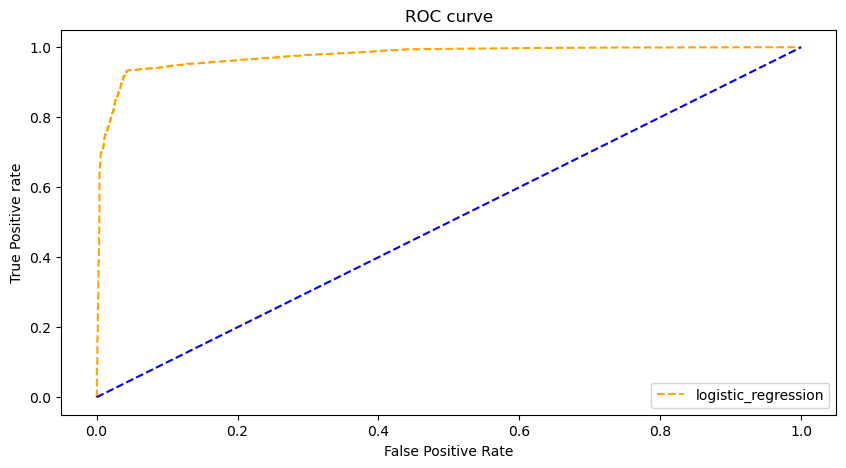

In [204]:
# plot roc curves
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, linestyle='--',color='orange',label="logistic_regression")
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc="best")
plt.show()

In [205]:
roc_curve?

In [206]:
from sklearn.ensemble import RandomForestClassifier



In [207]:
RandomForestClassifier?

In [211]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_depth = 10, max_features=4, n_jobs=-1)
radm_clf.fit( train_X, train_y )

NameError: name 'train_X' is not defined

In [212]:
x=req5.iloc[:,:-1]

In [213]:
y=req5.Recommend_Flag

In [214]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=123)

In [215]:
#tuning_the_parameters
param_grid = {'n_estimators':[100,200,300], 
              'max_features':[4,5,6,7]    
}


random_forest_gsv = GridSearchCV(RandomForestClassifier(), param_grid, scoring='roc_auc', cv=5, verbose=True)


In [216]:
random_forest_gsv.fit(train_x, train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [4, 5, 6, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=True)

In [217]:
random_forest_gsv.best_params_

{'max_features': 7, 'n_estimators': 300}

In [218]:
random_forest_model=RandomForestClassifier(n_estimators=300,max_features=6)

In [219]:
random_forest_model.fit(train_x, train_y)

RandomForestClassifier(max_features=6, n_estimators=300)

In [220]:
list2=list(random_forest_model.feature_importances_)

In [221]:
list4=list(train_x.columns)

In [222]:
list4[0]

'Customer_Age'

In [223]:
pd.DataFrame(pd.Series(list4))

0
0              Customer_Age
1                    Rating
2                 sentiment
3   Category_General_Petite
4        Category_Initmates
5      Subcategory1_Dresses
6      Subcategory1_General
7     Subcategory1_Intimate
8      Subcategory1_Jackets
9         Subcategory1_Tops
10       Subcategory1_Trend
11              Channel_Web
12         Location_Chennai
13         Location_Gurgaon
14          Location_Mumbai

In [224]:
req6=pd.concat([pd.DataFrame(pd.Series(list2)),pd.DataFrame(pd.Series(list4))],axis=1)

In [225]:
req6.columns=["feature_imp","variable_name"]

In [226]:
(req6.sort_values(by=["feature_imp"],ascending=False)).iloc[:5,:]

feature_imp            variable_name
1      0.686562                   Rating
2      0.160897                sentiment
0      0.085442             Customer_Age
11     0.011944              Channel_Web
3      0.011061  Category_General_Petite

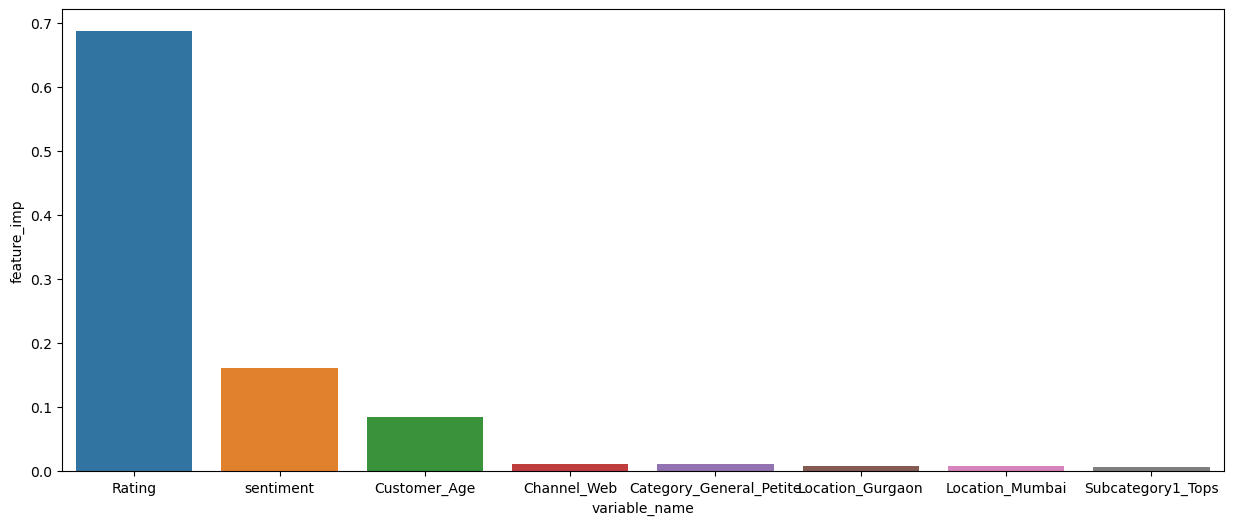

In [227]:
plt.figure(figsize=(15,6))
sns.barplot(x="variable_name",y="feature_imp",data=(req6.sort_values(by=["feature_imp"],ascending=False)).iloc[:8,:])
plt.show()
    

In [228]:
# topic Mining- creating topics and understanding themes behind the topics

In [229]:
df1.Review_Text

0             absolutely wonderful  silky sexy comfortable
1        love dress sooo pretty happened find store im ...
2        i high hope dress really wanted work me initia...
3        i love love love jumpsuit fun flirty fabulous ...
4        this shirt flattering due adjustable front tie...
                               ...                        
23481    i happy snag dress great price easy slip flatt...
23482    it reminds maternity clothes soft stretchy shi...
23483    this fit well top see through never would work...
23484    i bought dress wedding summer cute unfortunate...
23485    this dress lovely platinum feminine fit perfec...
Name: Review_Text, Length: 23486, dtype: object

In [230]:
dtm_count

_xd_  able  absolutely  across  actually  add  adorable  agree  all  \
0         0     0           1       0         0    0         0      0    0   
1         0     0           0       0         0    0         0      0    0   
2         0     0           0       0         0    0         0      0    0   
3         0     0           0       0         0    0         0      0    0   
4         0     0           0       0         0    0         0      0    0   
...     ...   ...         ...     ...       ...  ...       ...    ...  ...   
23481     0     0           0       0         0    0         0      0    0   
23482     0     0           0       0         0    0         0      0    0   
23483     0     1           0       0         0    0         0      0    0   
23484     0     0           0       0         0    0         0      0    0   
23485     0     0           0       0         0    0         0      0    0   

       almost  ...  worth  would  xl  xs  xx  year  yellow  yet  you  zipper  
0           0  ...      0      0   0   0   0     0       0    0    0       0  
1           0  ...      0      2   0   0   0     0       0    0    0       0  
2           0  ...      0      0   0   0   0     0       0    0    0       1  
3           0  ...      0      0   0   0   0     0       0    0    0       0  
4           0  ...      0      0   0   0   0     0       0    0    0       0  
...       ...  ...    ...    ...  ..  ..  ..   ...     ...  ...  ...     ...  
23481       0  ...      0      0   0   0   0     0       0    0    0       0  
23482       0  ...      0      0   0   0   0     0       0    0    0       0  
23483       0  ...      0      2   0   0   0     0       0    0    0       0  
23484       0  ...      1      0   0   0   0     0       0    0    0       0  
23485       0  ...      0      0   0   0   0     0       0    0    0       0  

[23486 rows x 500 columns]

In [231]:
! pip install gensim

  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/2d/30/074bac7a25866a2807c1005c7852c0139ac22ba837871fc01f16df29b9dc/FuzzyTM-2.0.9-py3-none-any.whl.metadata
  Using cached FuzzyTM-2.0.9-py3-none-any.whl.metadata (7.9 kB)
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/ed/ea/a3b120e251145dcdb10777f2bc5f18b1496fd999d705a178c1b0ad947ce1/pyFUME-0.3.4-py3-none-any.whl.metadata
  Using cached pyFUME-0.3.4-py3-none-any.whl.metadata (9.7 kB)
  Obtaining dependency information for scipy>=1.7.0 from https://files.pythonhosted.org/packages/65/76/903324159e4a3566e518c558aeb21571d642f781d842d8dd0fd9c6b0645a/scipy-1.10.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl.metadata (58 kB)
  Obtaining dependency information for simpful==2.12.0 from https://files.pythonhosted.org/packages/9d/0e/aebc2fb0b0f481994179b2ee2b8e6bbf0894d971594688c018375e7076ea/simpful-2.12.0-py3-n

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\DELL\\anaconda3\\Lib\\site-packages\\~cipy\\cluster\\_hierarchy.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [232]:
# Importing Gensim
import gensim
from gensim import corpora


In [233]:
gensim.corpora.Dictionary

gensim.corpora.dictionary.Dictionary

In [234]:
list5=[]

In [235]:
for i in df1.Review_Text:
    z=i.split( )
    list5.append(z)
    

In [236]:
list5

[['absolutely', 'wonderful', 'silky', 'sexy', 'comfortable'],
 ['love',
  'dress',
  'sooo',
  'pretty',
  'happened',
  'find',
  'store',
  'im',
  'glad',
  'bc',
  'never',
  'would',
  'ordered',
  'online',
  'bc',
  'petite',
  'bought',
  'petite',
  'love',
  'length',
  'me',
  'hit',
  'little',
  'knee',
  'would',
  'definitely',
  'true',
  'midi',
  'someone',
  'truly',
  'petite'],
 ['i',
  'high',
  'hope',
  'dress',
  'really',
  'wanted',
  'work',
  'me',
  'initially',
  'ordered',
  'petite',
  'small',
  'my',
  'usual',
  'size',
  'found',
  'outrageously',
  'small',
  'small',
  'fact',
  'could',
  'zip',
  'up',
  'reordered',
  'petite',
  'medium',
  'ok',
  'overall',
  'top',
  'half',
  'comfortable',
  'fit',
  'nicely',
  'bottom',
  'half',
  'tight',
  'layer',
  'several',
  'somewhat',
  'cheap',
  'net',
  'layers',
  'imo',
  'major',
  'design',
  'flaw',
  'net',
  'layer',
  'sewn',
  'directly',
  'zipper',
  'c'],
 ['i',
  'love',
  'lov

In [237]:
dictinorary_lda=corpora.Dictionary(list5)

In [238]:
dictinorary_lda.values()

ValuesView(<gensim.corpora.dictionary.Dictionary object at 0x00000219CE0F8D90>)

In [239]:
for i,k in dictinorary_lda.items():
    print(i,"--as_key ||",k,"--as_value")

0 --as_key || absolutely --as_value
1 --as_key || comfortable --as_value
2 --as_key || sexy --as_value
3 --as_key || silky --as_value
4 --as_key || wonderful --as_value
5 --as_key || bc --as_value
6 --as_key || bought --as_value
7 --as_key || definitely --as_value
8 --as_key || dress --as_value
9 --as_key || find --as_value
10 --as_key || glad --as_value
11 --as_key || happened --as_value
12 --as_key || hit --as_value
13 --as_key || im --as_value
14 --as_key || knee --as_value
15 --as_key || length --as_value
16 --as_key || little --as_value
17 --as_key || love --as_value
18 --as_key || me --as_value
19 --as_key || midi --as_value
20 --as_key || never --as_value
21 --as_key || online --as_value
22 --as_key || ordered --as_value
23 --as_key || petite --as_value
24 --as_key || pretty --as_value
25 --as_key || someone --as_value
26 --as_key || sooo --as_value
27 --as_key || store --as_value
28 --as_key || true --as_value
29 --as_key || truly --as_value
30 --as_key || would --as_value
31 -

In [240]:
dictinorary_lda.doc2bow(list5[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]

In [242]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
# doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
# doc_term_matrix

In [243]:
list5

[['absolutely', 'wonderful', 'silky', 'sexy', 'comfortable'],
 ['love',
  'dress',
  'sooo',
  'pretty',
  'happened',
  'find',
  'store',
  'im',
  'glad',
  'bc',
  'never',
  'would',
  'ordered',
  'online',
  'bc',
  'petite',
  'bought',
  'petite',
  'love',
  'length',
  'me',
  'hit',
  'little',
  'knee',
  'would',
  'definitely',
  'true',
  'midi',
  'someone',
  'truly',
  'petite'],
 ['i',
  'high',
  'hope',
  'dress',
  'really',
  'wanted',
  'work',
  'me',
  'initially',
  'ordered',
  'petite',
  'small',
  'my',
  'usual',
  'size',
  'found',
  'outrageously',
  'small',
  'small',
  'fact',
  'could',
  'zip',
  'up',
  'reordered',
  'petite',
  'medium',
  'ok',
  'overall',
  'top',
  'half',
  'comfortable',
  'fit',
  'nicely',
  'bottom',
  'half',
  'tight',
  'layer',
  'several',
  'somewhat',
  'cheap',
  'net',
  'layers',
  'imo',
  'major',
  'design',
  'flaw',
  'net',
  'layer',
  'sewn',
  'directly',
  'zipper',
  'c'],
 ['i',
  'love',
  'lov

In [244]:
list6=[]
for i  in range(len(list5)):
    z1=dictinorary_lda.doc2bow(list5[i])
    list6.append(z1)
        

In [245]:
list6

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 2),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 3),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 2)],
 [(1, 1),
  (8, 1),
  (18, 1),
  (22, 1),
  (23, 2),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 2),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 2),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 2),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 3),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1)],
 [(17, 3),
  (44, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1)],
 [(15, 1),
  (1

In [246]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [247]:
ldamodel = Lda(list6,num_topics=4, id2word = dictinorary_lda)

In [248]:
print(ldamodel.print_topics(num_topics=4, num_words=10))

[(0, '0.016*"fit" + 0.015*"wear" + 0.014*"love" + 0.012*"i" + 0.010*"great" + 0.009*"size" + 0.009*"im" + 0.008*"comfortable" + 0.008*"it" + 0.008*"like"'), (1, '0.021*"size" + 0.021*"top" + 0.017*"i" + 0.015*"color" + 0.013*"small" + 0.011*"fit" + 0.010*"like" + 0.010*"love" + 0.010*"ordered" + 0.010*"look"'), (2, '0.023*"dress" + 0.018*"fit" + 0.016*"look" + 0.015*"like" + 0.013*"size" + 0.011*"fabric" + 0.010*"would" + 0.009*"i" + 0.009*"waist" + 0.008*"im"'), (3, '0.035*"dress" + 0.025*"love" + 0.016*"i" + 0.016*"wear" + 0.014*"it" + 0.012*"great" + 0.011*"fit" + 0.010*"color" + 0.010*"perfect" + 0.010*"this"')]


Topic 1 has to do with size and color

topic 2 has to do wtih comfort of the clothes

topic 3 has to do with  fitting

Topic 4 has to do with fabric

In [249]:
# this command will print topics for each line, maximum topics for each line would be the number of topics which we defined while creating the lda model,the document can have 1 or 2 topics also depending upoon the keywords used in each document
# printing the topic associaltions with the documents

In [250]:
count1= 0
for i in ldamodel[list6]:
    print("doc : ",count1,i)
    count1 =count1+ 1

doc :  0 [(0, 0.044333924), (1, 0.04229541), (2, 0.042536136), (3, 0.8708345)]
doc :  1 [(0, 0.16417392), (1, 0.3847847), (2, 0.44264558)]
doc :  2 [(1, 0.6123404), (2, 0.31973335), (3, 0.06292082)]
doc :  3 [(0, 0.52389616), (1, 0.015083149), (2, 0.0152070075), (3, 0.44581366)]
doc :  4 [(0, 0.45324156), (1, 0.014957811), (2, 0.014627718), (3, 0.51717293)]
doc :  5 [(2, 0.5805383), (3, 0.40686613)]
doc :  6 [(1, 0.98230565)]
doc :  7 [(0, 0.2114919), (1, 0.7787027)]
doc :  8 [(0, 0.013988668), (1, 0.57244945), (2, 0.014137096), (3, 0.39942476)]
doc :  9 [(1, 0.5281251), (2, 0.15501328), (3, 0.30924582)]
doc :  10 [(1, 0.26226482), (2, 0.7215272)]
doc :  11 [(0, 0.044528853), (1, 0.043438893), (2, 0.59346586), (3, 0.3185664)]
doc :  12 [(2, 0.21223511), (3, 0.773618)]
doc :  13 [(0, 0.6958533), (2, 0.28916588)]
doc :  14 [(1, 0.3394819), (2, 0.4926658), (3, 0.16219983)]
doc :  15 [(0, 0.19386645), (2, 0.79457515)]
doc :  16 [(1, 0.08637381), (2, 0.89844465)]
doc :  17 [(0, 0.66891813),

In [251]:
## functions for assigniing topics to each documents with the maximum score

list7=[]
list8=[]
rand_1=0
rand_2=0
for j in ldamodel[list6]:
    list7.append(rand_1)
    list8.append(rand_2)
    for i in j:
        topic_nu=i[0]
        topic_score=i[1]
        if topic_score>rand_1:
            rand_1=topic_score
            rand_2=topic_nu


    
        
        
    
        
    

In [252]:
# Initialize rand_2 and rand_3
rand_2 = float('-inf')  # Set to negative infinity to find the maximum
rand_3 = None  # Placeholder value for topic_nu_1

# Iterate through the topics
k = ldamodel[list6[-1]]
for i in k:
    topic_nu_1 = i[0]
    topic_score_1 = i[1]
    if topic_score_1 > rand_2:
        rand_2 = topic_score_1  # Ensure to use the correct variable here
        rand_3 = topic_nu_1

# Check if rand_3 has been assigned before appending
if rand_3 is not None:
    list7.append(rand_2)
    list8.append(rand_3)
else:
    print("No topic met the condition for assignment.")

In [253]:
k=ldamodel[list6[-1]]
for i in k:
    topic_nu_1=i[0]
    topic_score_1=i[1]
    if topic_score_1>rand_2:
        rand_2=topic_score
        rand_3=topic_nu_1
list7.append(rand_2)
list8.append(rand_3)

        

In [254]:
list7=list7[1:]

In [255]:
list8=list8[1:]

In [256]:

for i in ldamodel[list6]:
    print(i)

[(0, 0.044409208), (1, 0.04229564), (2, 0.04253648), (3, 0.87075865)]
[(0, 0.1623557), (1, 0.38642228), (2, 0.44282588)]
[(1, 0.6123371), (2, 0.31973606), (3, 0.06292128)]
[(0, 0.52383494), (1, 0.015083139), (2, 0.015207009), (3, 0.44587496)]
[(0, 0.45163885), (1, 0.014958213), (2, 0.0146273775), (3, 0.5187756)]
[(2, 0.58052814), (3, 0.4068763)]
[(1, 0.9822956)]
[(0, 0.21148744), (1, 0.778707)]
[(0, 0.013988609), (1, 0.57245904), (2, 0.014131902), (3, 0.39942044)]
[(1, 0.5291721), (2, 0.15348586), (3, 0.30972624)]
[(1, 0.26225558), (2, 0.72153646)]
[(0, 0.044535007), (1, 0.043436803), (2, 0.59101176), (3, 0.3210164)]
[(2, 0.21223395), (3, 0.7736192)]
[(0, 0.6958365), (2, 0.28918394)]
[(1, 0.33945236), (2, 0.49270004), (3, 0.16219571)]
[(0, 0.19386281), (2, 0.79457885)]
[(1, 0.08637382), (2, 0.89844465)]
[(0, 0.6689259), (2, 0.31415513)]
[(0, 0.9582106), (1, 0.01369303), (2, 0.014003246), (3, 0.014093191)]
[(1, 0.31272498), (2, 0.09169117), (3, 0.58676314)]
[(2, 0.9762063)]
[(0, 0.23965

In [257]:
df1.Review_Text

0             absolutely wonderful  silky sexy comfortable
1        love dress sooo pretty happened find store im ...
2        i high hope dress really wanted work me initia...
3        i love love love jumpsuit fun flirty fabulous ...
4        this shirt flattering due adjustable front tie...
                               ...                        
23481    i happy snag dress great price easy slip flatt...
23482    it reminds maternity clothes soft stretchy shi...
23483    this fit well top see through never would work...
23484    i bought dress wedding summer cute unfortunate...
23485    this dress lovely platinum feminine fit perfec...
Name: Review_Text, Length: 23486, dtype: object

In [258]:
req7=pd.concat([df1.Review_Text,pd.Series(list7),pd.Series(list8)],axis=1)

In [259]:
req7.columns=["review_text","score_of_topics","topic_no"]

In [260]:
req7.topic_no.value_counts()

topic_no
2    22536
1      902
0       41
3        8
Name: count, dtype: int64

In [261]:
req7

review_text  score_of_topics  \
0           absolutely wonderful  silky sexy comfortable         0.870788   
1      love dress sooo pretty happened find store im ...         0.870788   
2      i high hope dress really wanted work me initia...         0.870788   
3      i love love love jumpsuit fun flirty fabulous ...         0.870788   
4      this shirt flattering due adjustable front tie...         0.870788   
...                                                  ...              ...   
23482  it reminds maternity clothes soft stretchy shi...         0.985687   
23483  this fit well top see through never would work...         0.985687   
23484  i bought dress wedding summer cute unfortunate...         0.985687   
23485  this dress lovely platinum feminine fit perfec...         0.944413   
23486                                                NaN         0.944406   

       topic_no  
0             3  
1             3  
2             3  
3             3  
4             3  
...         ...  
23482         2  
23483         2  
23484         2  
23485         3  
23486         3  

[23487 rows x 3 columns]